In [1]:
# Import all libraries needed for the tutorial
import pandas as pd
import numpy as np
import psycopg2
import sys
from pandas.io import sql
from pandas.io.sql import read_sql
import statsmodels.formula.api as smf

#pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

Python version 3.4.3 |Anaconda 2.2.0 (x86_64)| (default, Mar  6 2015, 12:07:41) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version 0.16.1


In [2]:
con = psycopg2.connect("dbname=testdb user=tim")  
#cur = con.cursor()
print("con is open")

con is open


In [3]:
sql = "SELECT * FROM vam JOIN chiisat ON vam.school_id = chiisat.school_id WHERE vam.grade = %s AND vam.year = %s AND chiisat.grade = %s AND chiisat.year = %s ORDER BY vam.school_id;"

data = pd.read_sql(sql, con, index_col=None, coerce_float=True, params=['4th Grade','2012','4th Grade','2012'], parse_dates=None, columns=None, chunksize=None)

if con:
    con.close()

data[:3]

,school_name,school_id,network,grade,year,reading_studentsnumber,reading_vam,reading_confidence,reading_percentile,reading_color,math_studentsnumber,math_vam,math_confidence,math_percentile,math_color,school_name,school_id,unit,network,grade,year,readme,mathme,compme,readexc,mathexc,compexc,readmeet,mathmeet,compmeet,readblw,mathblw,compblw,readwrn,mathwrn,compwrn,readtst,mathtst
0,GLOBAL CITIZENSHIP CHTR,400009,Charter/Contract Schools,4th Grade,2012,34.7,0.8,-0.1 to 1.7,79,Yellow,34.7,0.0,-0.8 to 0.7,48,Yellow,GLOBAL CITIZENSHIP CHTR,400009,2025,Charter,4th Grade,2012,72.9,87.5,80.6,12.5,12.5,9.7,60.4,75,70.8,27.1,12.5,19.4,0,0,0,48,48
1,"LOCKE, A CHTR",400011,Charter/Contract Schools,4th Grade,2012,39.0,0.3,-0.6 to 1.1,60,Yellow,39.0,0.2,-0.5 to 1,62,Yellow,"LOCKE, A CHTR",400011,4730,Charter,4th Grade,2012,80.0,92.5,83.3,32.5,22.5,21.7,47.5,70,61.7,20.0,7.5,16.7,0,0,0,40,40
2,BRONZEVILLE LTHOUSE CHTR CAMPUS,400019,Charter/Contract Schools,4th Grade,2012,46.1,-1.3,-2.1 to -0.5,9,Red,46.1,0.3,-0.3 to 1,64,Yellow,BRONZEVILLE LTHOUSE CHTR CAMPUS,400019,3990,Charter,4th Grade,2012,76.0,86.0,74.7,8.0,28.0,12.7,68.0,58,62.0,22.0,12.0,23.3,2,2,2,50,50


In [4]:
data.dtypes
#Check if sql request was successful - yes, number matches that found in excel
#data.info()

school_name                object
school_id                  object
network                    object
grade                      object
year                       object
reading_studentsnumber    float64
reading_vam               float64
reading_confidence         object
reading_percentile        float64
reading_color              object
math_studentsnumber       float64
math_vam                  float64
math_confidence            object
math_percentile           float64
math_color                 object
school_name                object
school_id                  object
unit                       object
network                    object
grade                      object
year                       object
readme                    float64
mathme                    float64
compme                    float64
readexc                   float64
mathexc                   float64
compexc                   float64
readmeet                  float64
mathmeet                  float64
compmeet      

In [5]:
data.shape

(440, 38)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     151.7
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           3.87e-30
Time:                        22:06:13   Log-Likelihood:                -1802.8
No. Observations:                 440   AIC:                             3610.
Df Residuals:                     438   BIC:                             3618.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     64.5760      0.696     92.804      0.000        63.208    65.944
x              8.6739      0.704     12.317      0.000         7.290    10.058
==============================================================================
Omnibus:                        9.192   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                5.310
Skew:                           0.034   Prob(JB):                       0.0703
Kurtosis:                       2.466   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

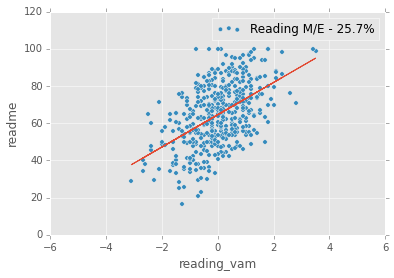

In [18]:
x = data['reading_vam']
y = data['readme']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readme',label="Reading M/E - 25.7%")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     123.3
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           2.07e-25
Time:                        22:08:07   Log-Likelihood:                -1822.8
No. Observations:                 440   AIC:                             3650.
Df Residuals:                     438   BIC:                             3658.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     19.3722      0.728     26.601      0.000        17.941    20.803
x              8.1842      0.737     11.104      0.000         6.736     9.633
==============================================================================
Omnibus:                      145.886   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              424.055
Skew:                           1.579   Prob(JB):                     8.27e-93
Kurtosis:                       6.626   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

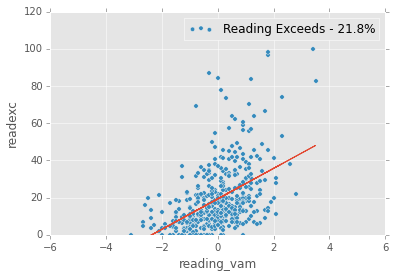

In [19]:
x = data['reading_vam']
y = data['readexc']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readexc',label="Reading Exceeds - 21.8%")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9512
Date:                Sat, 15 Aug 2015   Prob (F-statistic):              0.330
Time:                        22:09:40   Log-Likelihood:                -1656.9
No. Observations:                 440   AIC:                             3318.
Df Residuals:                     438   BIC:                             3326.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     45.2024      0.499     90.496      0.000        44.221    46.184
x              0.4931      0.506      0.975      0.330        -0.501     1.487
==============================================================================
Omnibus:                       71.282   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.136
Skew:                          -0.929   Prob(JB):                     5.51e-29
Kurtosis:                       4.909   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

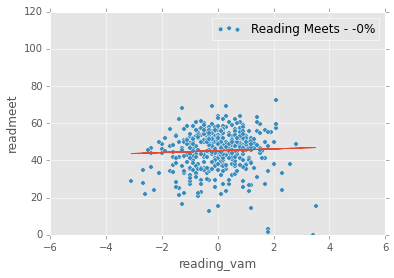

In [20]:
x = data['reading_vam']
y = data['readmeet']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readmeet',label="Reading Meets - -0%")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     145.6
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           3.84e-29
Time:                        22:11:13   Log-Likelihood:                -1776.1
No. Observations:                 440   AIC:                             3556.
Df Residuals:                     438   BIC:                             3564.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     33.4547      0.655     51.078      0.000        32.167    34.742
x             -7.9986      0.663    -12.066      0.000        -9.301    -6.696
==============================================================================
Omnibus:                        4.620   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                3.235
Skew:                           0.004   Prob(JB):                        0.198
Kurtosis:                       2.580   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

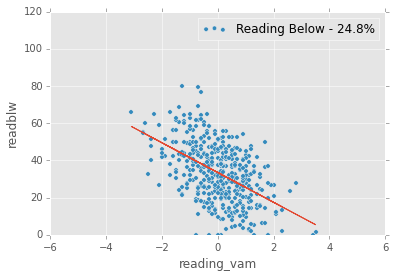

In [21]:
x = data['reading_vam']
y = data['readblw']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readblw',label="Reading Below - 24.8%")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     36.13
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           3.88e-09
Time:                        22:12:27   Log-Likelihood:                -996.83
No. Observations:                 440   AIC:                             1998.
Df Residuals:                     438   BIC:                             2006.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.9698      0.111     17.677      0.000         1.751     2.189
x             -0.6779      0.113     -6.011      0.000        -0.900    -0.456
==============================================================================
Omnibus:                      148.672   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.485
Skew:                           1.601   Prob(JB):                     8.23e-97
Kurtosis:                       6.727   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

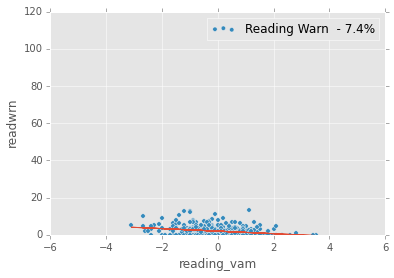

In [22]:
x = data['reading_vam']
y = data['readwrn']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readwrn',label="Reading Warn  - 7.4%")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     86.26
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           7.41e-19
Time:                        21:58:31   Log-Likelihood:                -1700.5
No. Observations:                 440   AIC:                             3405.
Df Residuals:                     438   BIC:                             3413.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     81.9607      0.552    148.485      0.000        80.876    83.046
x              5.0637      0.545      9.288      0.000         3.992     6.135
==============================================================================
Omnibus:                       22.929   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.134
Skew:                          -0.577   Prob(JB):                     3.49e-06
Kurtosis:                       3.195   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

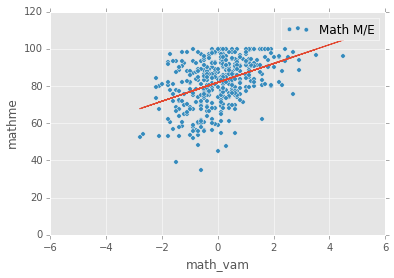

In [12]:
x = data['math_vam']
y = data['mathme']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathme',label="Math M/E")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     81.70
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           5.14e-18
Time:                        21:58:52   Log-Likelihood:                -1842.7
No. Observations:                 440   AIC:                             3689.
Df Residuals:                     438   BIC:                             3698.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     21.7618      0.763     28.540      0.000        20.263    23.260
x              6.8075      0.753      9.039      0.000         5.327     8.288
==============================================================================
Omnibus:                      123.624   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              284.626
Skew:                           1.438   Prob(JB):                     1.56e-62
Kurtosis:                       5.694   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

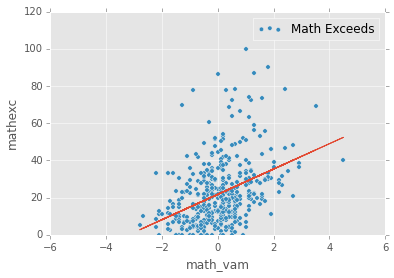

In [14]:
x = data['math_vam']
y = data['mathexc']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathexc',label="Math Exceeds")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     9.026
Date:                Sat, 15 Aug 2015   Prob (F-statistic):            0.00281
Time:                        21:59:02   Log-Likelihood:                -1727.9
No. Observations:                 440   AIC:                             3460.
Df Residuals:                     438   BIC:                             3468.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     60.1978      0.587    102.483      0.000        59.043    61.352
x             -1.7431      0.580     -3.004      0.003        -2.883    -0.603
==============================================================================
Omnibus:                       85.668   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.509
Skew:                          -1.031   Prob(JB):                     3.85e-40
Kurtosis:                       5.377   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

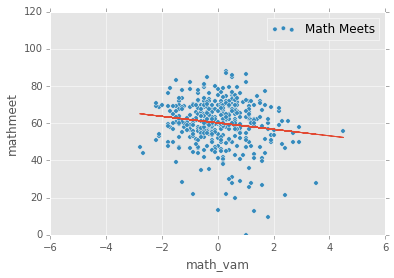

In [15]:
x = data['math_vam']
y = data['mathmeet']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathmeet',label="Math Meets")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     79.11
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           1.55e-17
Time:                        21:59:09   Log-Likelihood:                -1635.0
No. Observations:                 440   AIC:                             3274.
Df Residuals:                     438   BIC:                             3282.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     15.8141      0.476     33.250      0.000        14.879    16.749
x             -4.1785      0.470     -8.895      0.000        -5.102    -3.255
==============================================================================
Omnibus:                       20.279   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.866
Skew:                           0.538   Prob(JB):                     1.79e-05
Kurtosis:                       3.182   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

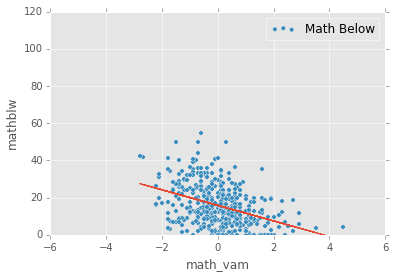

In [16]:
x = data['math_vam']
y = data['mathblw']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathblw',label="Math Below")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     39.20
Date:                Sat, 15 Aug 2015   Prob (F-statistic):           9.12e-10
Time:                        21:59:16   Log-Likelihood:                -1108.3
No. Observations:                 440   AIC:                             2221.
Df Residuals:                     438   BIC:                             2229.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.2283      0.144     15.510      0.000         1.946     2.511
x             -0.8885      0.142     -6.261      0.000        -1.167    -0.610
==============================================================================
Omnibus:                      208.914   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1045.908
Skew:                           2.069   Prob(JB):                    7.65e-228
Kurtosis:                       9.318   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

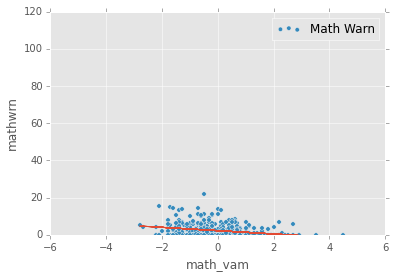

In [17]:
x = data['math_vam']
y = data['mathwrn']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathwrn',label="Math Warn")
plt.ylim(0, 120)
plt.xlim(-6, 6)

plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()